In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.set_option("display.max_columns",None)

In [6]:
sales = pd.read_csv("supermarket_sales - Sheet1.csv")
sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [3]:
sales.shape

(1000, 17)

In [4]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
sales[sales.duplicated]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [6]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
sales["Time"]=pd.to_datetime(sales["Time"],format="%H:%M")

In [9]:
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

# SALES ANALYSIS

## Sales by City

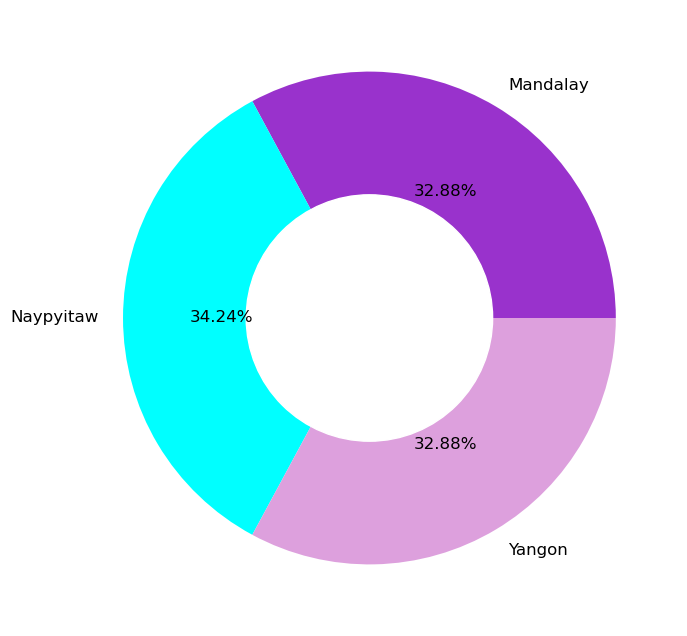

In [8]:
sales_by_city = sales.groupby("City")["Total"].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_city,  
        labels=sales_by_city.index,  
        autopct='%1.2f%%',  
        colors=["darkorchid", "aqua", "plum"],  
        textprops={'fontsize': 12})

center_circle = plt.Circle((0, 0), 0.5, color='white')
plt.gca().add_patch(center_circle)

plt.show()

## Top selling product by gender 

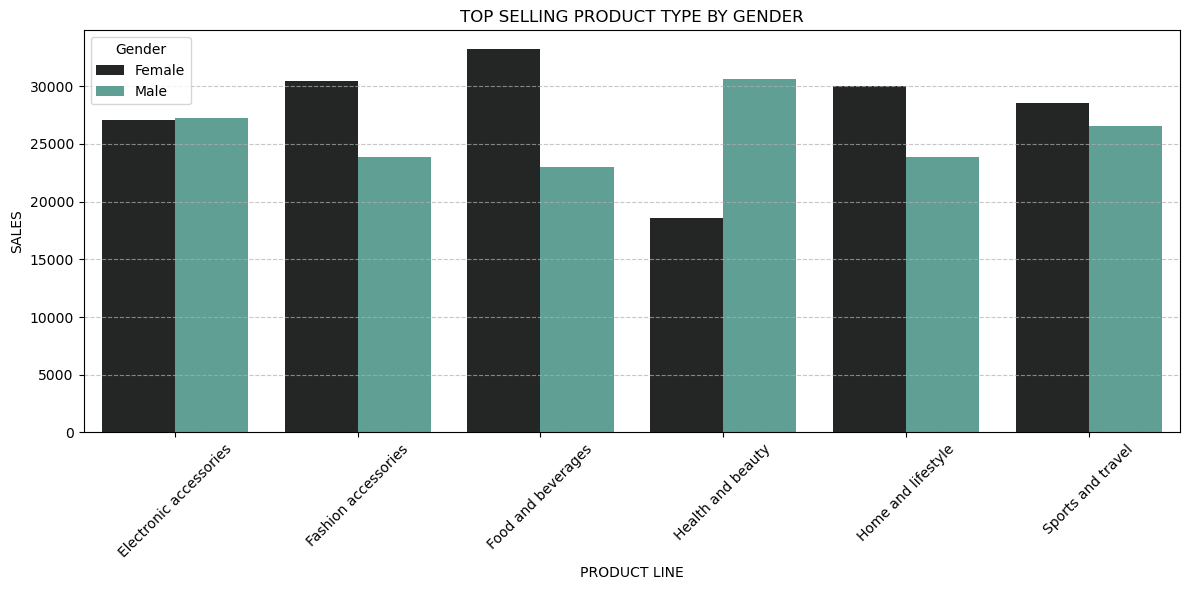

In [14]:

sales_by_product_Type = sales.groupby(["Product line", "Gender"])["Total"].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Product line", y="Total", hue="Gender", data=sales_by_product_Type, palette="dark:#5A9")

plt.xlabel('PRODUCT LINE')
plt.ylabel('SALES')
plt.title('TOP SELLING PRODUCT TYPE BY GENDER')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Gender')
plt.tight_layout()
plt.show()



## sales by month

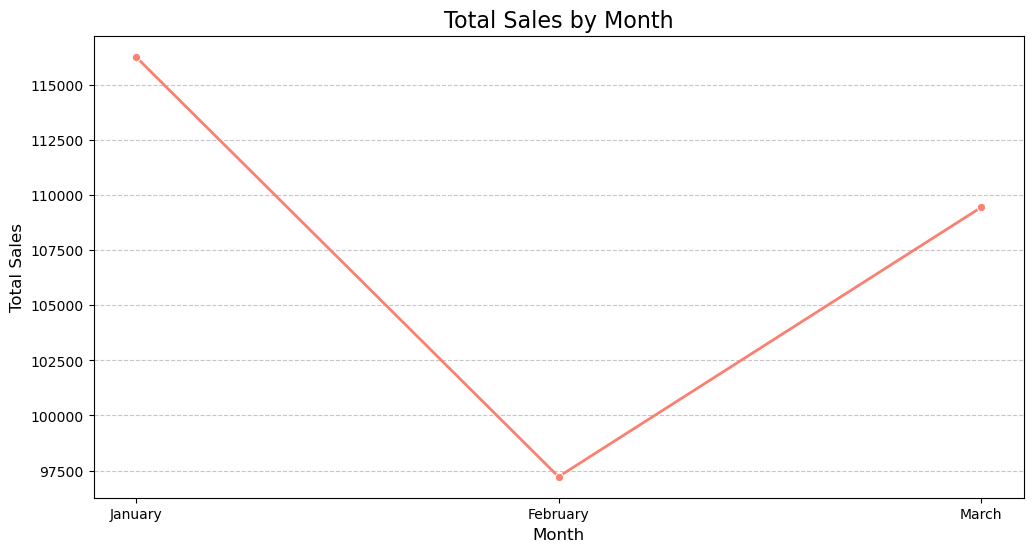

In [16]:
sales["Date"] = pd.to_datetime(sales["Date"], format="%m/%d/%Y")  # Adjusted for correct format
sales["Month"] = sales["Date"].dt.month_name()


sales_by_month = sales.groupby("Month")["Total"].sum().reset_index()
month_order = ["January", "February", "March"]
sales_by_month = sales_by_month.set_index("Month").reindex(month_order).reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_month, x="Month", y="Total", marker="o", color="salmon", linestyle="-", linewidth=2)
plt.title("Total Sales by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=0)  # Keeping labels horizontal for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()


## Sales done in a week

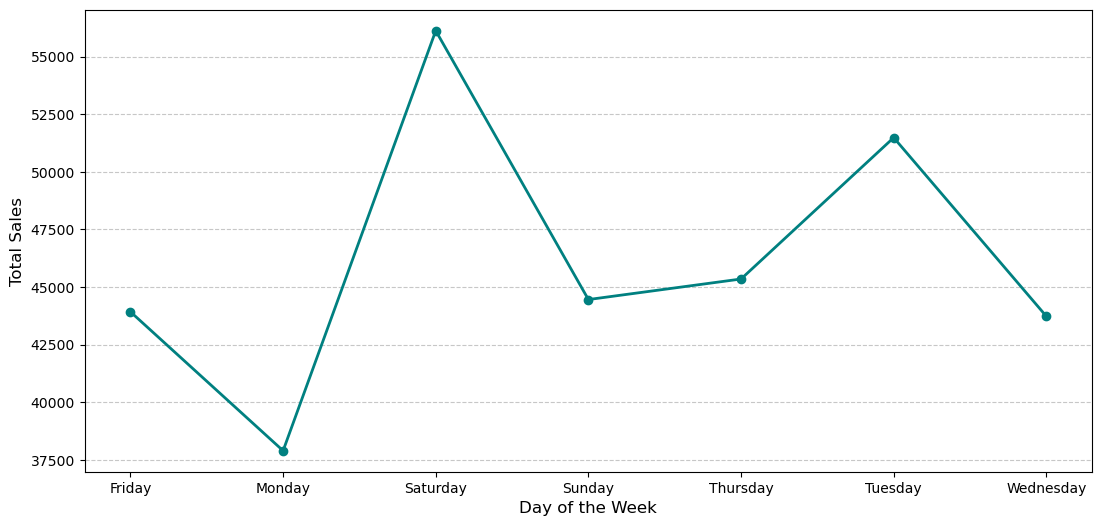

In [18]:
sales['day_of_week'] = sales['Date'].dt.day_name()
sales_by_day = sales.groupby("day_of_week")["Total"].sum()

plt.figure(figsize=(13,6))
sales_by_day.plot(kind='line', marker='o', color='teal', linestyle='-', linewidth=2)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 


# CUSTOMER DEMOGRAPHICS

# Gender Distribution by sales

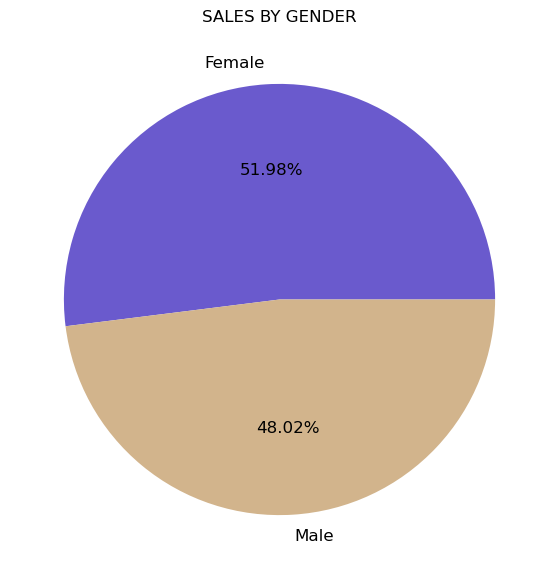

In [21]:
sales_by_gender = sales.groupby("Gender")["Total"].sum()
plt.figure(figsize=(7, 7))
plt.pie(sales_by_gender, 
        labels=sales_by_gender.index,  
        autopct='%1.2f%%',  
        colors=["slateblue", "tan"],  
        textprops={'fontsize': 12})  
plt.title("SALES BY GENDER")
plt.show()

# Customer Type Analysis

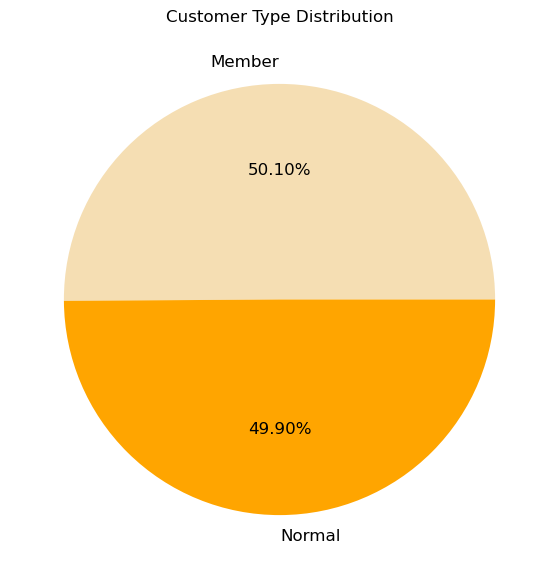

In [23]:
Customer_Type = sales["Customer type"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(Customer_Type, 
        labels=Customer_Type.index,  
        autopct='%1.2f%%',  
        colors=["wheat", "orange"],  
        textprops={'fontsize': 12})  
plt.title("Customer Type Distribution")
plt.show()


# TRANSACTION INSIGHTS

## Payment Method Analysis

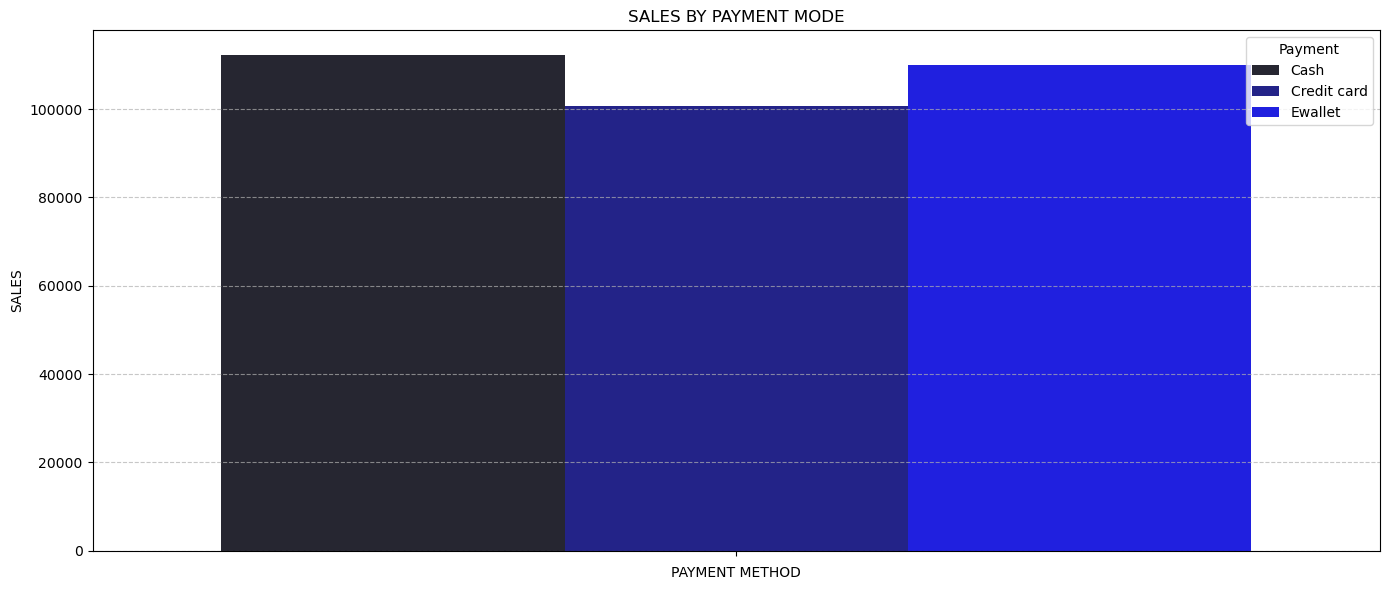

In [26]:

sales_by_payment_mode = sales.groupby("Payment")["Total"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(hue="Payment", y="Total", data=sales_by_payment_mode, palette="dark:blue")

plt.xlabel('PAYMENT METHOD')
plt.ylabel('SALES')
plt.title('SALES BY PAYMENT MODE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Purchase Quantity vs. Unit Price

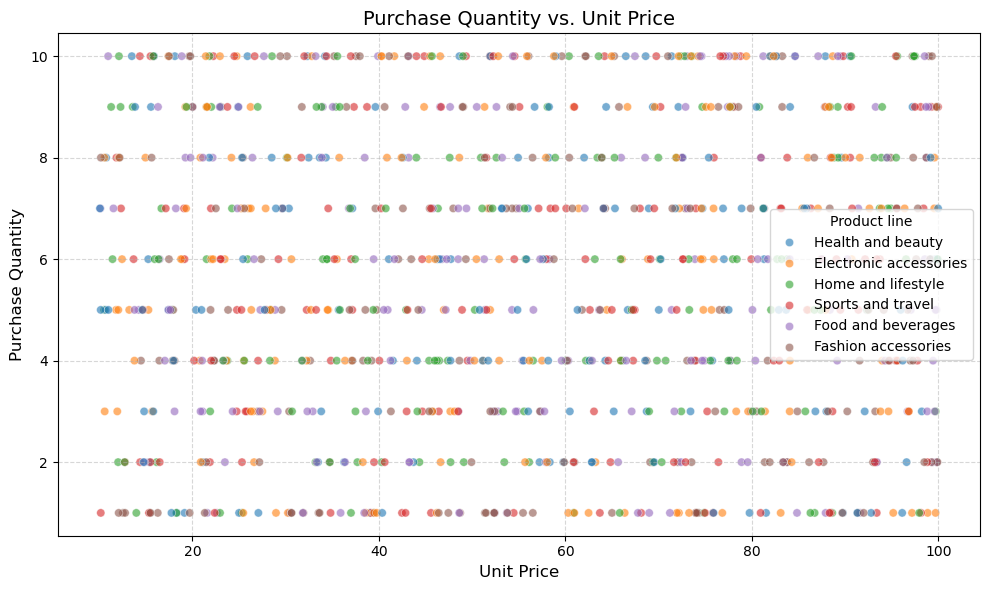

In [28]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales, x="Unit price", y="Quantity", hue="Product line", alpha=0.6)

plt.xlabel("Unit Price", fontsize=12)
plt.ylabel("Purchase Quantity", fontsize=12)
plt.title("Purchase Quantity vs. Unit Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# PROFITAIBILITY ANALYSIS

## Gross margin pecentage distribution

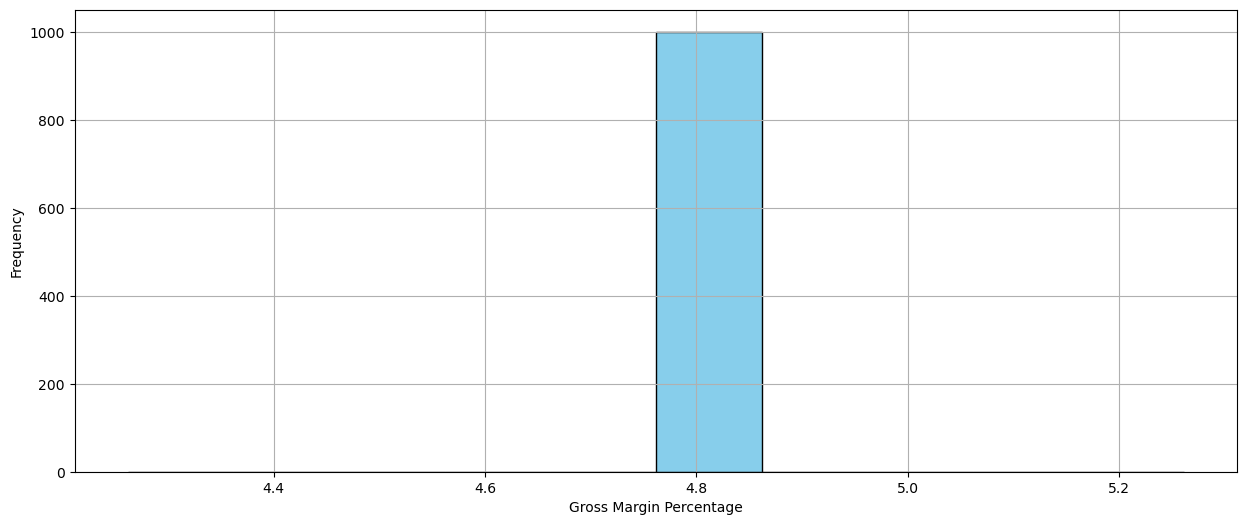

In [31]:
gross_margin_percentage=sales["gross margin percentage"]
plt.figure(figsize=(15,6))
plt.hist(gross_margin_percentage, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Gross Margin Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Gross Income per Product Line

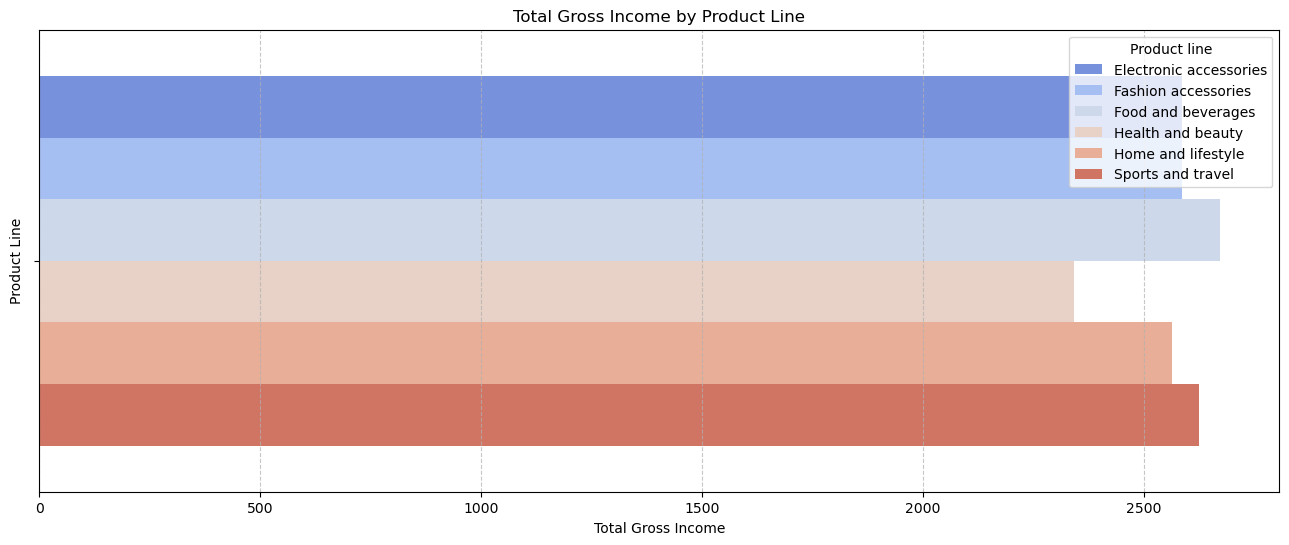

In [33]:

gross_income_by_product = sales.groupby("Product line")["gross income"].sum().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(data=gross_income_by_product, x="gross income", hue="Product line" ,palette="coolwarm")
plt.xlabel("Total Gross Income")
plt.ylabel("Product Line")
plt.title("Total Gross Income by Product Line")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# RATING ANALYSIS

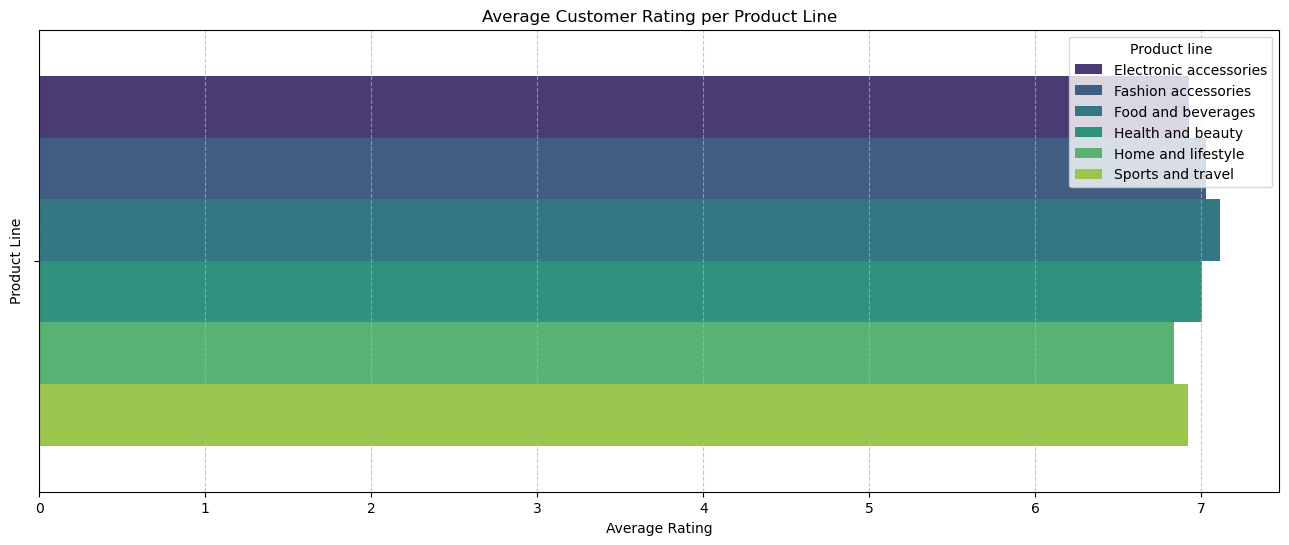

In [35]:
avg_rating_by_product = sales.groupby("Product line")["Rating"].mean().reset_index()

# Set up the plot
plt.figure(figsize=(16,6))
sns.barplot(data=avg_rating_by_product, x="Rating", hue="Product line", palette="viridis")

# Customize the plot
plt.xlabel("Average Rating")
plt.ylabel("Product Line")
plt.title("Average Customer Rating per Product Line")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## FREQUENCY OF RATING GIVEN

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10944\1107710899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=sales, palette='magma')


Text(0.5, 1.0, 'Frequency of Ratings Given by Customers')

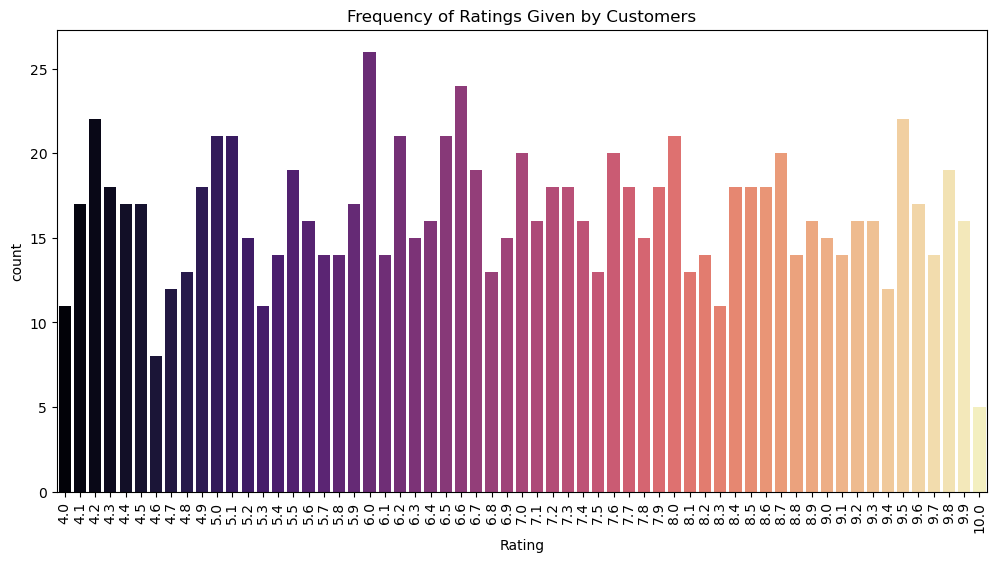

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Rating', data=sales, palette='magma')
plt.xticks(rotation=90)
plt.title('Frequency of Ratings Given by Customers')


# TIME BASED-PATTERNS

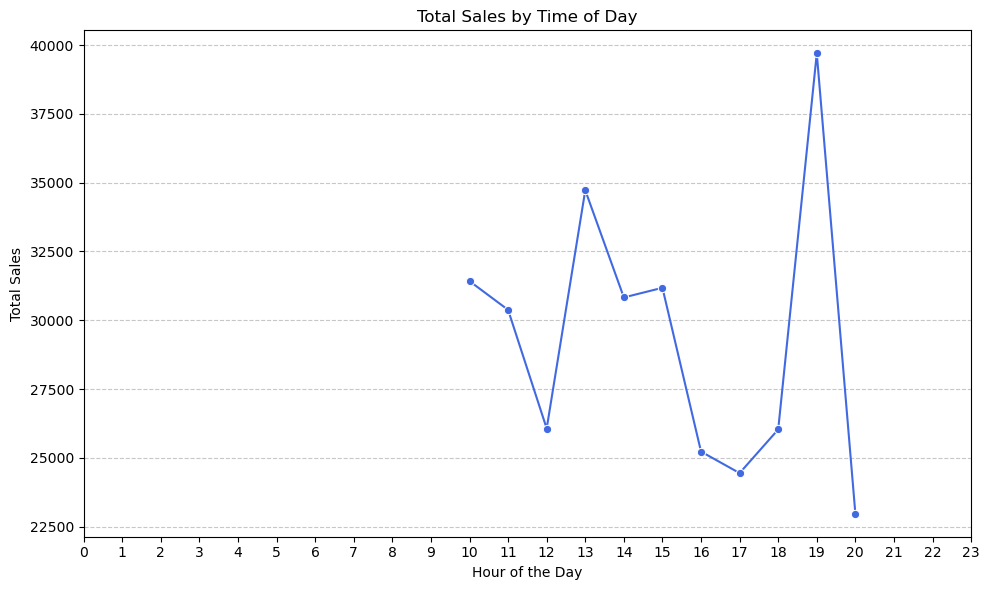

In [37]:

# Extract the hour
sales["Hour"] = sales["Time"].dt.hour

# Group by hour and sum the Total sales
sales_by_hour = sales.groupby("Hour")["Total"].sum().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_hour, x="Hour", y="Total", marker="o", color="royalblue")

# Customize the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.title("Total Sales by Time of Day")
plt.xticks(range(0, 24))  # Adjust based on actual hours of operation
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## day wise sales heatmap

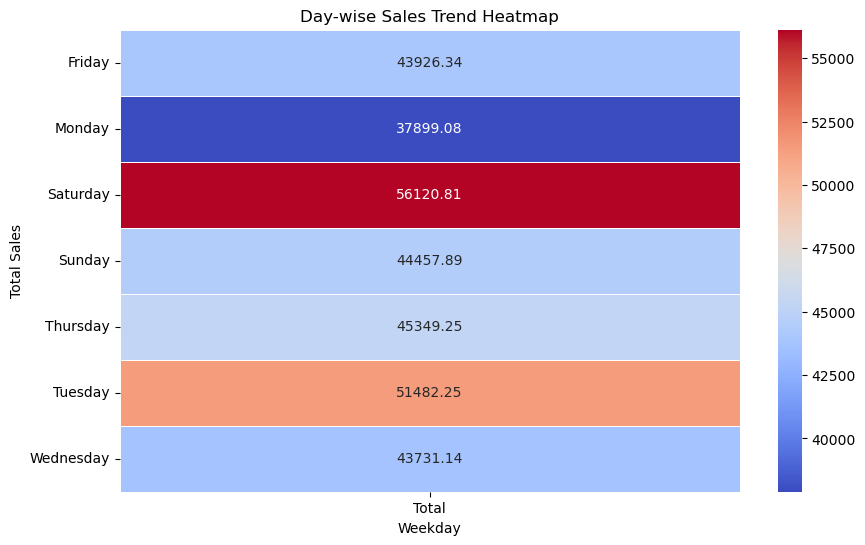

In [39]:
# Convert Date column to datetime format and extract weekday
sales["Date"] = pd.to_datetime(sales["Date"])
sales["day_of_week"] = sales["Date"].dt.day_name()  # Extract weekday name

# Group by weekday and sum the Total sales
sales_by_day = sales.groupby("day_of_week")["Total"].sum().reset_index()

# Order weekdays correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day = sales_by_day.set_index("day_of_week").reindex(weekday_order).reset_index()

# Set up the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(sales_by_day.pivot_table(values="Total", index="day_of_week"),
            cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title("Day-wise Sales Trend Heatmap")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")

# Show the plot
plt.show()


## QUANTITY DISTRIBUTION BY PRODUCT TYPE

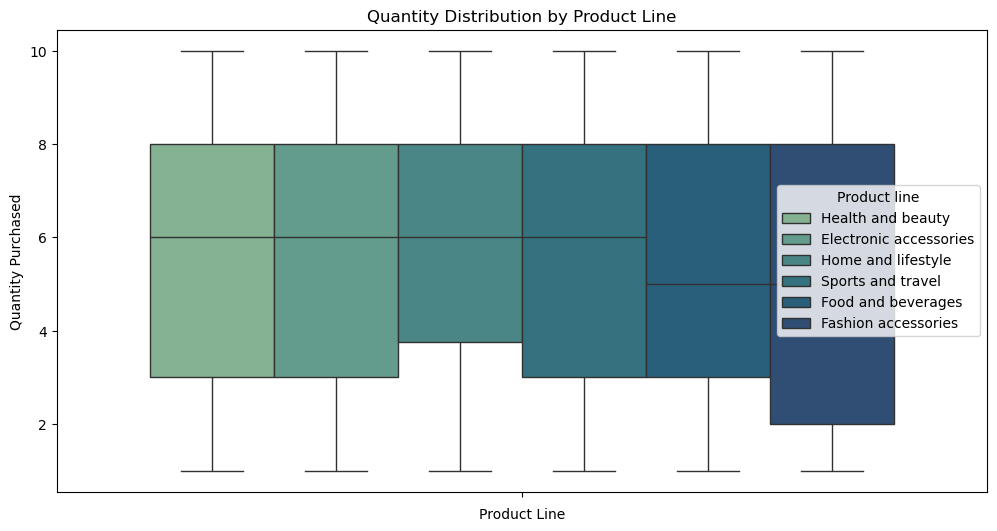

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(data=sales, hue="Product line", y="Quantity", palette="crest")


plt.xlabel("Product Line")
plt.ylabel("Quantity Purchased")
plt.title("Quantity Distribution by Product Line")
plt.xticks(rotation=45)

plt.show()

# Interactive Map of Branch Locations (Using Folium)

In [10]:
import folium
import pandas as pd

# City data with assigned colors
sales = pd.DataFrame({
    'city': ["Yangon", "Mandalay", "Naypyitaw"],
    'lat': [16.8409, 21.9588, 19.7633],
    'lon': [96.1735, 96.0891, 96.0785],
    'color': ["red", "green", "blue"] 
})

# Create base map
m = folium.Map(location=[20.5263, 95.6750], zoom_start=8)


for _, row in sales.iterrows():
    folium.Marker(
        [row['lat'], row['lon']],
        popup=row['city'],
        tooltip="Click me!",
        icon=folium.Icon(color=row['color'])
    ).add_to(m)

# Save the map to HTML
m.save("colorful_map.html")
m